File already exists. Skipping download.


C:\Users\user\AppData\Local\Temp\ipykernel_16760\3030856730.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


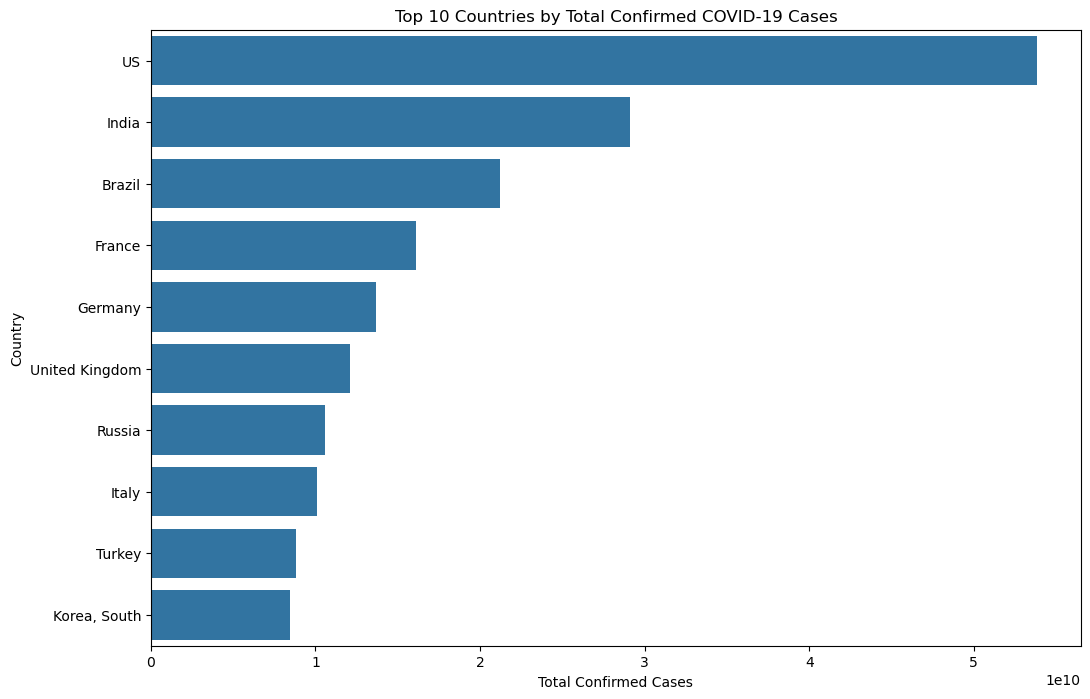

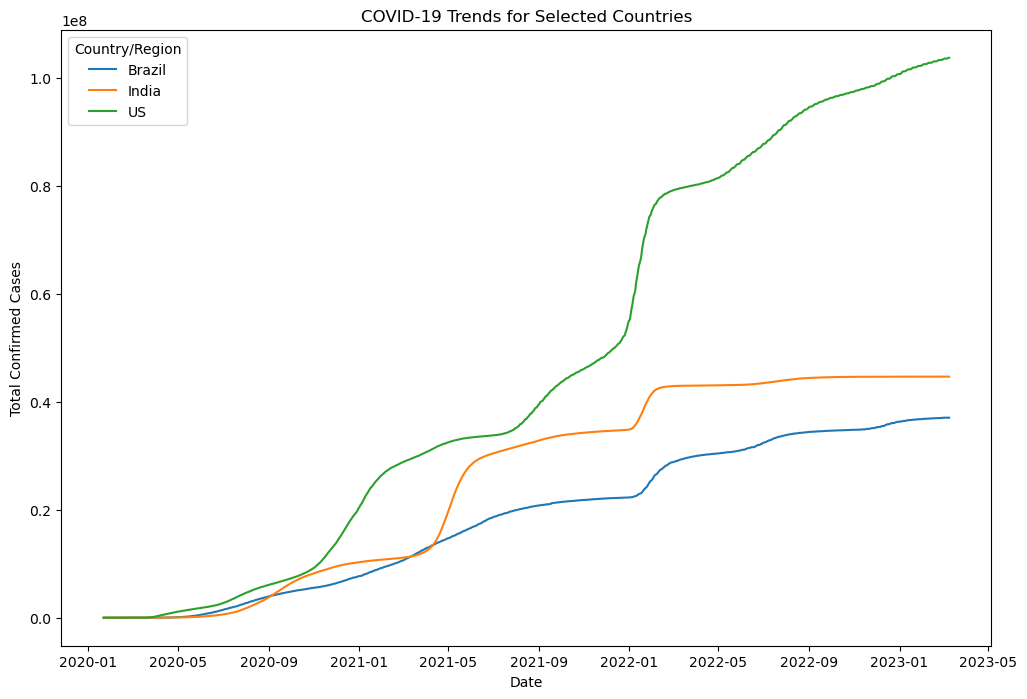

In [5]:
# COVID-19 Data Analysis and Visualization Project
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading Data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

if not os.path.exists('covid19_data.csv'):
    try:
        response = requests.get(url)
        response.raise_for_status()
        with open('covid19_data.csv', 'wb') as file:
            file.write(response.content)
        print("Data downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
else:
    print("File already exists. Skipping download.")

# Processing Data
df = pd.read_csv('covid19_data.csv')
if df.empty:
    print("Dataset is empty. Exiting.")
    exit()

df = df.drop(['Lat', 'Long'], axis=1)
df = df.melt(id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Confirmed')
df['Date'] = pd.to_datetime(df['Date'])

# Data Analysis
total_cases = df.groupby('Country/Region', as_index=False)['Confirmed'].sum().sort_values('Confirmed', ascending=False)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=total_cases.head(10))
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

# Trend Visualization for Selected Countries
countries = ['US', 'India', 'Brazil']
trend_df = df[df['Country/Region'].isin(countries)]
trend_df = trend_df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_df, x='Date', y='Confirmed', hue='Country/Region')
plt.title('COVID-19 Trends for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()
